In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from decimal import Decimal
from matplotlib import rc

In [2]:
rc('text', usetex=True)
rc('font', family='serif')
rc('font', serif='times')
rc('mathtext', default='sf')
rc("lines", markeredgewidth=1)
rc("lines", linewidth=1)
rc('axes', labelsize=25)
rc("axes", linewidth=1)
rc('xtick', labelsize=20)
rc('ytick', labelsize=20)
rc('legend', fontsize=20)
rc('ytick', right='True',direction= 'in')
rc('xtick', top='True',direction= 'in')
rc('xtick.major', pad=15)
rc('ytick.major', pad=15)
rc('xtick.major', size=12)
rc('ytick.major', size=12)
rc('xtick.minor', size=7)
rc('ytick.minor', size=7)

# Here we solve the Lane-Emden equation

The Lane-Emden equation is:
\begin{equation}
    \frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2\frac{d\theta}{d\xi}\right)+\theta^n = 0
\end{equation}
where $n$ is the polytropic index, and the dimensionless variables $\theta$ and $\xi$ are related to the physical density and radial coordinates as:
$$
    \rho = \rho_c\theta^n,\,\,r = a\xi
$$
where $\rho_c$ is the central density and 
$$
    a = \left[\frac{(n+1)K\rho_c^{\frac{1}{n}-1}}{4\pi G}\right]^{1/2}
$$

In [3]:
n = 3./2. #set the polytropic index
#setting the boundary conditions:
y0 = [1,0]

In [4]:
def f(y,xi):
    #y is a vector such that y[0] = \theta and y[1] = d\theta/d\xi
    #This function returns [d\theta/d\xi,d^2\theta/d\xi^2]
    return [y[1], - 2.*y[1]/xi - pow(y[0],n)]

xi_s = np.linspace(1e-12,3.6,200) #modify end of this array according to value of n
sol = odeint(f,y0,xi_s)
theta_s = sol[:,0]

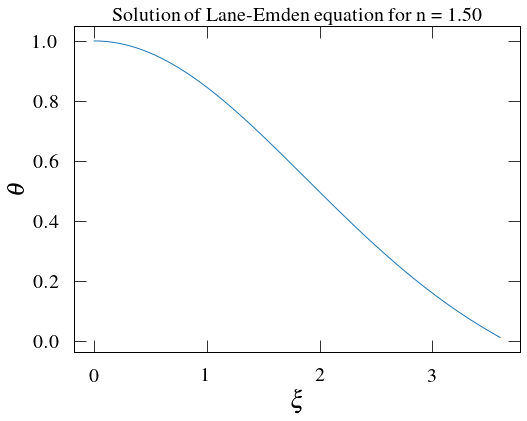

In [5]:
plt.figure(figsize = (8,6))
plt.title('Solution of Lane-Emden equation for n = %3.2f'%n,size = 20)
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\theta$")
plt.plot(xi_s,theta_s)
plt.show()

Determining the surface $\xi_\star$ of the star

In [6]:
#print(min(np.abs(theta_s)))
loc = np.where(theta_s == min(np.abs(theta_s)))[0][0]
xi_star = xi_s[loc]
print('xi_star = %6.3f'%xi_star)

xi_star =  3.600


Determining $\frac{d\theta}{d\xi}(\xi_\star)$

In [7]:
dt_dx = (theta_s[loc]-theta_s[loc-1])/(xi_s[loc]-xi_s[loc-1])
print('Slope at xi_star = %6.3f'%dt_dx)

Slope at xi_star = -0.210


# Mass radius relation of white dwarfs

In [8]:
G = 6.67e-8
mu_e = 2
K = 1e13 * pow(mu_e,-5./3.)
rhoc = np.logspace(6,9,100)
#Let
C = (n+1)*K/(4*np.pi*G)

Comparing the numerical and analytical solutions for the mass-radius relation for a given polytropic index $n$

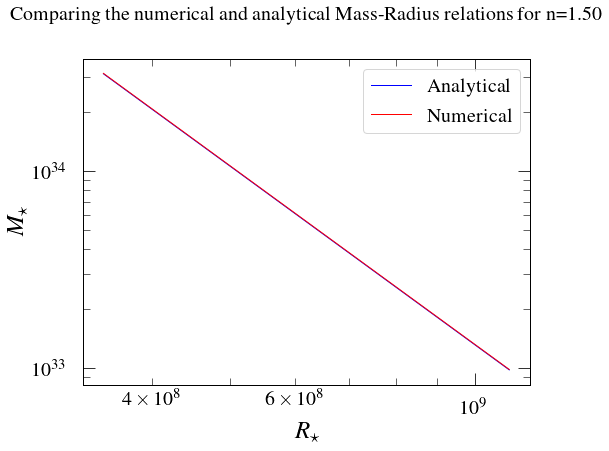

In [14]:
plt.figure(figsize = (8,6))
R_star, M_star = [],[] #stores the analytical result
Rstar,Mstar = [],[] #stores the numerical result
for rho_c in rhoc:
    R = pow(C,0.5)*pow(rho_c,(1-n)/(2*n))*xi_star
    R_star.append(R)
    M_star.append(4*np.pi*pow(R,(3-n)/(1-n))*pow(C,n/(n-1))*pow(xi_star,(3-n)/(n-1)+2)*abs(dt_dx))

    a = pow(C*pow(rho_c,1./n-1),0.5)
    Rstar.append(a*xi_star)
    m=0.
    dr = a*xi_s[1]-xi_s[0]
    for i in range(len(theta_s)):
        rho = rho_c*pow(theta_s[i],n)
        r = a*xi_s[i]
        m+=4*np.pi*r*r*rho*dr
    Mstar.append(m)

plt.loglog(Rstar,Mstar,color = 'b',label = 'Analytical')
plt.loglog(R_star,M_star,color = 'r',label = 'Numerical')
plt.title('Comparing the numerical and analytical Mass-Radius relations for n=%3.2f'%n,size = 20,y=1.1)
plt.xlabel(r'$R_\star$')
plt.ylabel(r'$M_\star$')
plt.legend()
plt.show()